In [1]:
import numpy as np
from numpy.polynomial.chebyshev import chebfit, chebval
from numpy.polynomial.chebyshev import Chebyshev

import pandas as pd

from utils.data_loader import load_from_tsfile_to_dataframe
from utils.regressor_tools import process_data
#import mlflow
#from tsfeatures import tsfeatures
np.set_printoptions(threshold=np.inf)
#pd.set_option('display.max_rows', None)  
#pd.set_option('display.max_columns', None) 
from utils.personal_utils import load_dataset

import os
import matplotlib.pyplot as plt

In [21]:
def cpt_compress_t(signal, dropout_ratio, andDecompress:bool):
    # Normalize the signal to the range [-1, 1]
    #t = min_max_normalize_np(signal)
    
    # Create the time vector for Chebyshev fitting
    x = np.linspace(-1, 1, signal.size)

    #t = np.arange(signal.size)

    # Fit Chebyshev polynomial
    cpt_coeffs = chebfit(x, signal, deg=signal.size-1)

    #cheb_fit = Chebyshev.fit(x, signal, signal.size)
    #cpt_coeffs = cheb_fit.coef

    plt.plot(cpt_coeffs)

    


    # Calculate the number of coefficients to zero out
    num_coeffs = int((dropout_ratio) * len(cpt_coeffs))
    
    # Sort the coefficients by value and cut off the smallest ones
    sorted_indices = np.argsort(np.abs(cpt_coeffs))
    indices_to_zero = sorted_indices[:num_coeffs]

    #print(cpt_coeffs)
    # Zero out selected coefficients
    cpt_coeffs[indices_to_zero] = 0
    #print(cpt_coeffs)

    plt.plot(cpt_coeffs)

    num_nonzero_after = np.sum(np.abs(cpt_coeffs) > 0)  

    print(f'Number of non-zero coefficients after compression: {num_nonzero_after}')
    print(num_coeffs)
    print(indices_to_zero)
    print(signal.size)


    if andDecompress == False:
        return cpt_coeffs
    else:
        # Decompress and inverse normalize the signal
        #cheb_fit_compressed = Chebyshev(cpt_coeffs)
        #cheb_approx_compressed = cheb_fit_compressed(x)

        cheb_approx_compressed = chebval(x, cpt_coeffs)
        #decompressed_signal = inverse_min_max_normalize_np(decompressed_signal_norm, np.min(signal), np.max(signal))







        return cheb_approx_compressed


In [14]:

data_path = "/home/sim/Desktop/TS Extrinsic Regression/data/IEEEPPG_TEST.ts"
dataset_array = load_dataset(data_path)
dataset_id = os.path.basename(data_path).split('_')[0]

1351it [00:03, 361.55it/s]
100%|██████████| 1328/1328 [00:02<00:00, 533.49it/s]


Number of non-zero coefficients after compression: 80
20
[98 99 96 97 94 95 92 93  6 90 91 88 34 64 86 89  0 24 52 46]
100


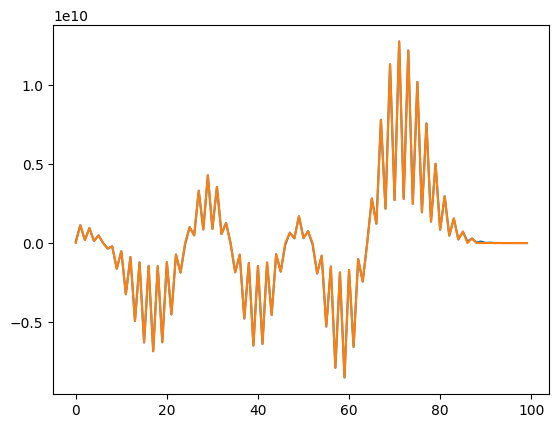

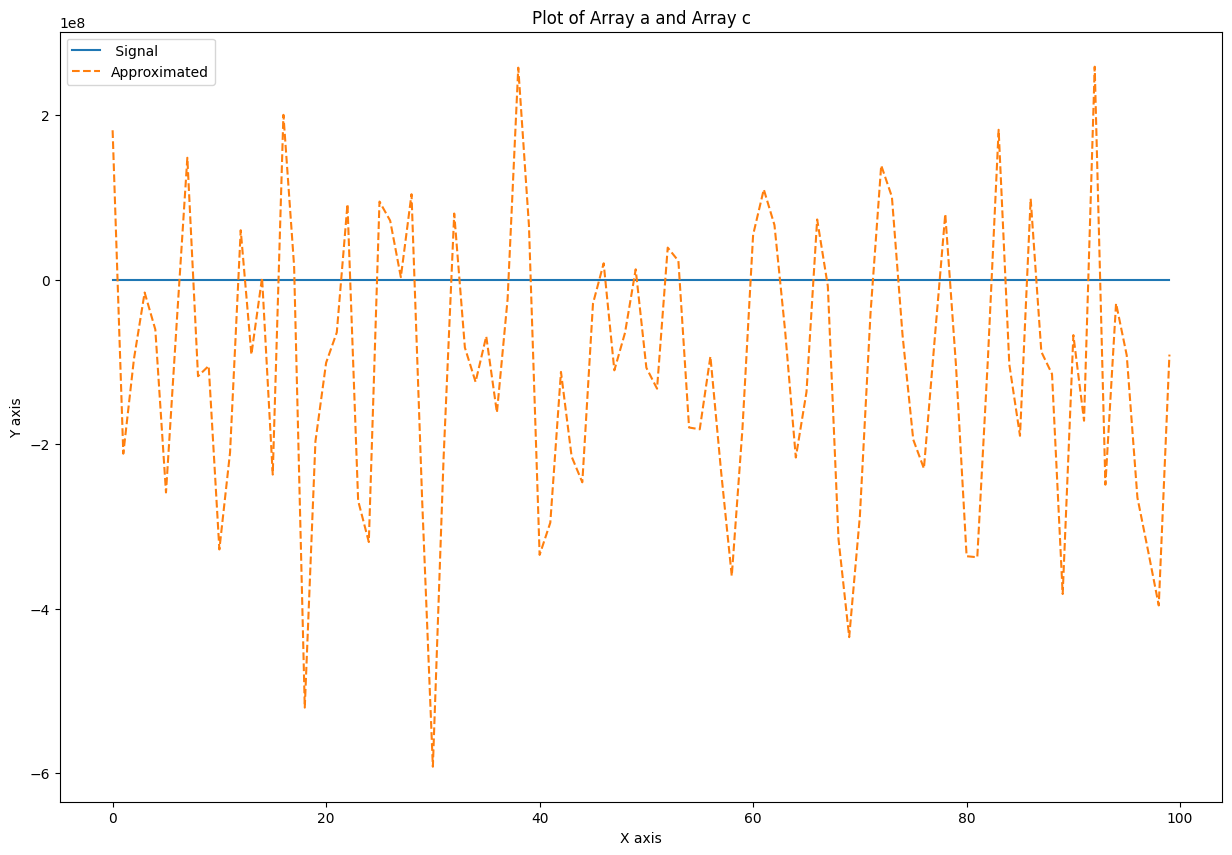

(100,) (100,)


In [37]:
a = dataset_array[0,:100,0]


#x = np.linspace(-1, 1, 100)
#a = signal = np.sin(5 * np.pi * x) * 100
#a = x**2 - 4 * x + 5
#a = np.random.rand(1000)

# Add noise
#a = a + + np.random.normal(4, 0.3, a.shape)


# Min-max normalization to bring the values into range [-1, 1]
""" min_val = np.min(a)
max_val = np.max(a)
a = -1 + 2 * (a- min_val) / (max_val - min_val)

print(max(a), min(a)) """



c = cpt_compress_t(a, 0.2, True)
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15,10))

# Plot the arrays
ax.plot(a, label=' Signal')
#ax.plot(b, label='Array b')
ax.plot(c, label='Approximated', linestyle='--', markersize=5)

# Add a legend
ax.legend()

# Add labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_title('Plot of Array a and Array c')

# Show the plot
plt.show()
print(a.shape, c.shape)

Some Visualisations from AI

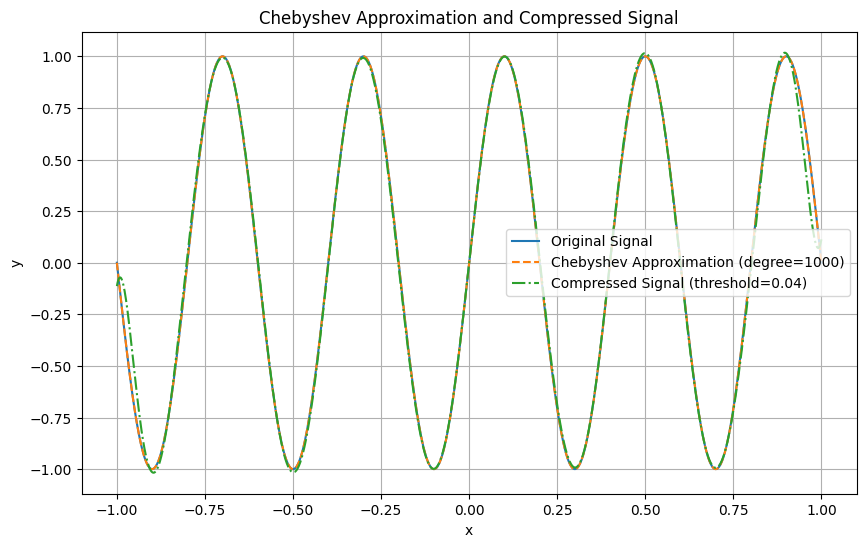

Number of non-zero coefficients before compression: 1001
Number of non-zero coefficients after compression: 9


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.chebyshev import Chebyshev

# Step 1: Generate a sample signal
x = np.linspace(-1, 1, 1000)
signal = np.sin(5 * np.pi * x)  # Example signal: a sine wave

# Step 2: Perform Chebyshev approximation
degree = 1000  # Degree of the Chebyshev polynomial
cheb_fit = Chebyshev.fit(x, signal, degree)

# Evaluate the Chebyshev polynomial at the points x
cheb_approx = cheb_fit(x)

# Step 3: Apply thresholding to the Chebyshev coefficients
threshold = 0.04  # Threshold value for compression
cheb_coeffs = cheb_fit.coef
cheb_coeffs_compressed = np.where(np.abs(cheb_coeffs) < threshold, 0, cheb_coeffs)

# Reconstruct the signal using the compressed coefficients
cheb_fit_compressed = Chebyshev(cheb_coeffs_compressed)
cheb_approx_compressed = cheb_fit_compressed(x)

# Step 4: Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(x, signal, label='Original Signal')
plt.plot(x, cheb_approx, label=f'Chebyshev Approximation (degree={degree})', linestyle='--')
plt.plot(x, cheb_approx_compressed, label=f'Compressed Signal (threshold={threshold})', linestyle='-.')
plt.legend()
plt.title('Chebyshev Approximation and Compressed Signal')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

# Print the number of non-zero coefficients before and after compression
num_nonzero_before = np.sum(np.abs(cheb_coeffs) > 0)
num_nonzero_after = np.sum(np.abs(cheb_coeffs_compressed) > 0)
print(f'Number of non-zero coefficients before compression: {num_nonzero_before}')
print(f'Number of non-zero coefficients after compression: {num_nonzero_after}')


Processing Sine Wave...


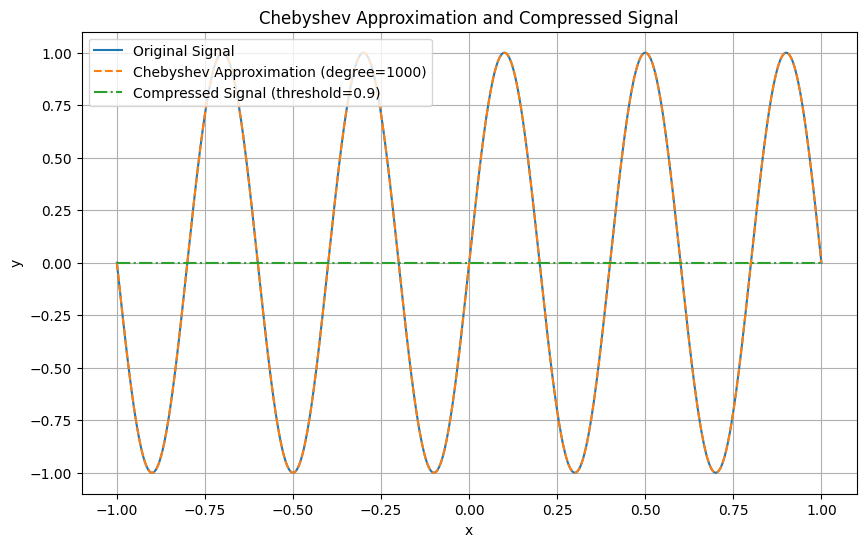

Number of non-zero coefficients before compression: 1001
Number of non-zero coefficients after compression: 0

Processing Cosine Wave...


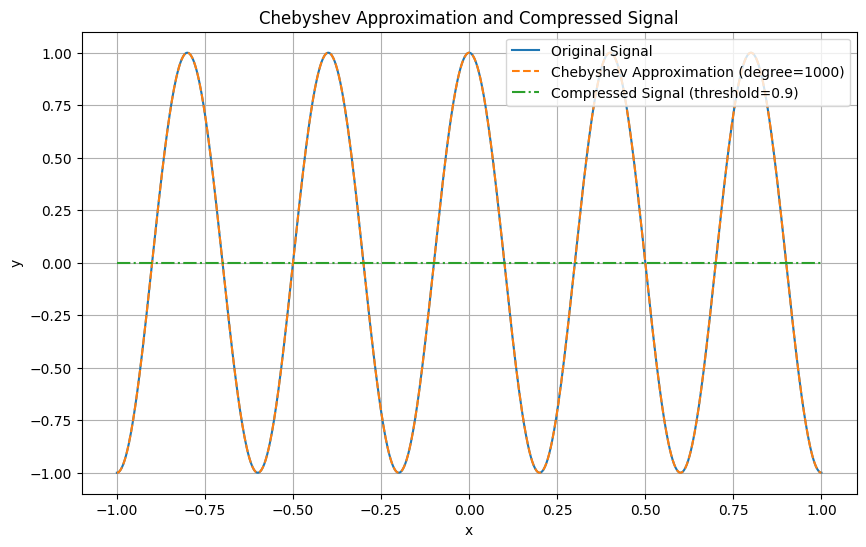

Number of non-zero coefficients before compression: 1001
Number of non-zero coefficients after compression: 0

Processing Polynomial...


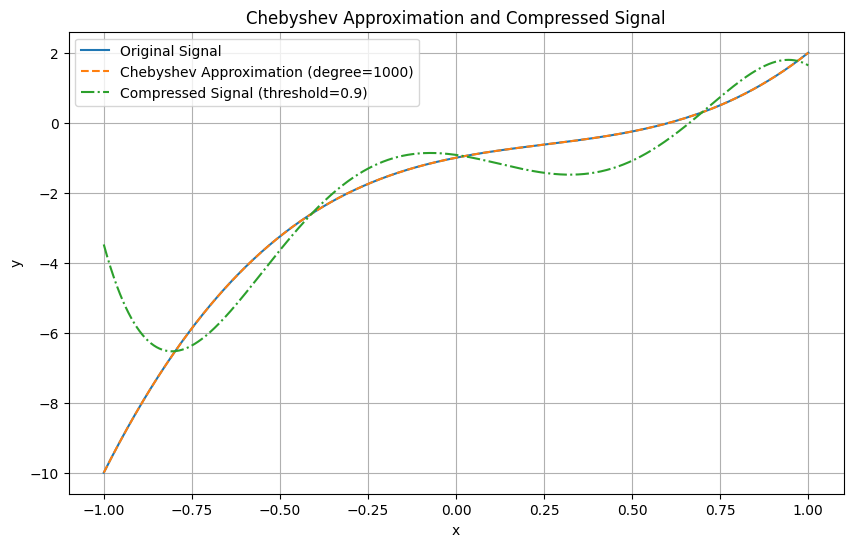

Number of non-zero coefficients before compression: 1001
Number of non-zero coefficients after compression: 4

Processing Exponential...


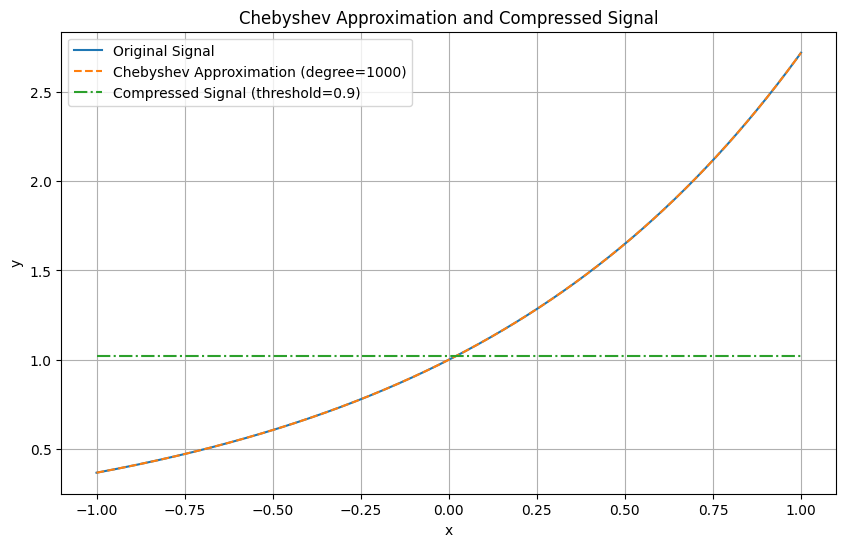

Number of non-zero coefficients before compression: 1001
Number of non-zero coefficients after compression: 1

Processing Step Function...


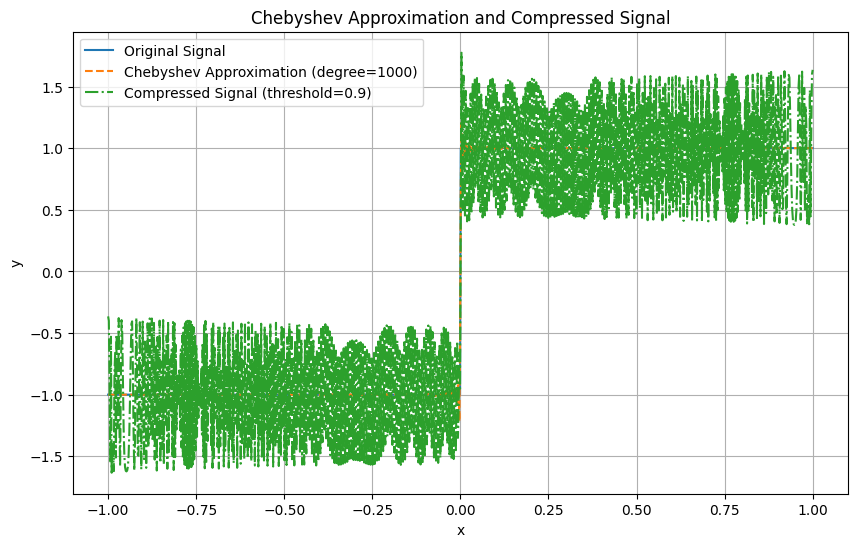

Number of non-zero coefficients before compression: 1001
Number of non-zero coefficients after compression: 999

Processing Absolute Value...


KeyboardInterrupt: 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.chebyshev import Chebyshev

def chebyshev_approximation(signal_func, x, degree, threshold):
    signal = signal_func(x)

    # Perform Chebyshev approximation
    cheb_fit = Chebyshev.fit(x, signal, degree)

    # Evaluate the Chebyshev polynomial at the points x
    cheb_approx = cheb_fit(x)

    # Apply thresholding to the Chebyshev coefficients
    cheb_coeffs = cheb_fit.coef
    cheb_coeffs_compressed = np.where(np.abs(cheb_coeffs) < threshold, 0, cheb_coeffs)

    # Reconstruct the signal using the compressed coefficients
    cheb_fit_compressed = Chebyshev(cheb_coeffs_compressed)
    cheb_approx_compressed = cheb_fit_compressed(x)

    return signal, cheb_approx, cheb_approx_compressed, cheb_coeffs, cheb_coeffs_compressed

def visualize_results(x, signal, cheb_approx, cheb_approx_compressed, degree, threshold):
    plt.figure(figsize=(10, 6))
    plt.plot(x, signal, label='Original Signal')
    plt.plot(x, cheb_approx, label=f'Chebyshev Approximation (degree={degree})', linestyle='--')
    plt.plot(x, cheb_approx_compressed, label=f'Compressed Signal (threshold={threshold})', linestyle='-.')
    plt.legend()
    plt.title('Chebyshev Approximation and Compressed Signal')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()

    # Print the number of non-zero coefficients before and after compression
    num_nonzero_before = np.sum(np.abs(cheb_coeffs) > 0)
    num_nonzero_after = np.sum(np.abs(cheb_coeffs_compressed) > 0)
    print(f'Number of non-zero coefficients before compression: {num_nonzero_before}')
    print(f'Number of non-zero coefficients after compression: {num_nonzero_after}')

# Step 1: Generate a sample signal
x = np.linspace(-1, 1, 1000)
degree = 1000  # Degree of the Chebyshev polynomial
threshold = 0.9  # Threshold value for compression

# Define different functions to approximate
functions = {
    'Sine Wave': lambda x: np.sin(5 * np.pi * x),
    'Cosine Wave': lambda x: np.cos(5 * np.pi * x),
    'Polynomial': lambda x: 4 * x**3 - 3 * x**2 + 2 * x - 1,
    'Exponential': lambda x: np.exp(x),
    'Step Function': lambda x: np.where(x < 0, -1, 1),
    'Absolute Value': lambda x: np.abs(x)
}

# Iterate through each function and apply Chebyshev approximation and compression
for func_name, func in functions.items():
    print(f'\nProcessing {func_name}...')
    signal, cheb_approx, cheb_approx_compressed, cheb_coeffs, cheb_coeffs_compressed = chebyshev_approximation(func, x, degree, threshold)
    visualize_results(x, signal, cheb_approx, cheb_approx_compressed, degree, threshold)


Number of non-zero coefficients after compression: 900


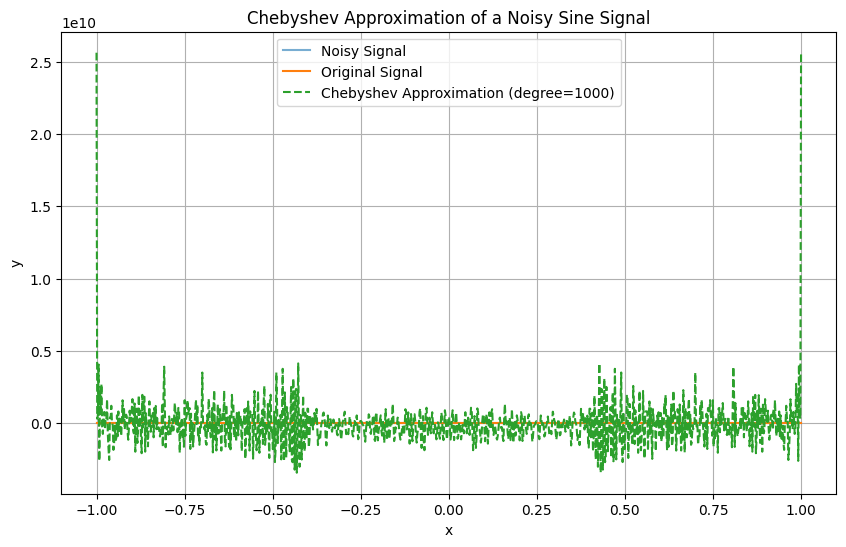

Number of non-zero coefficients after compression: 900


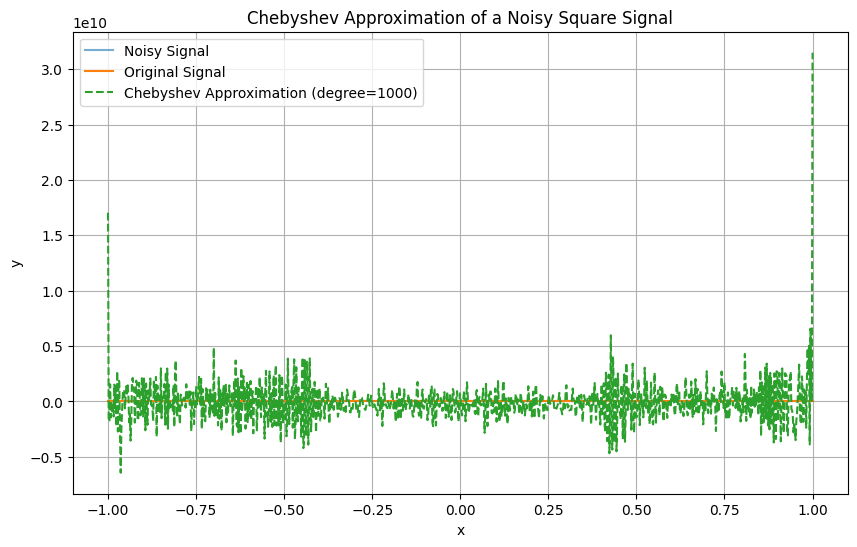

Number of non-zero coefficients after compression: 900


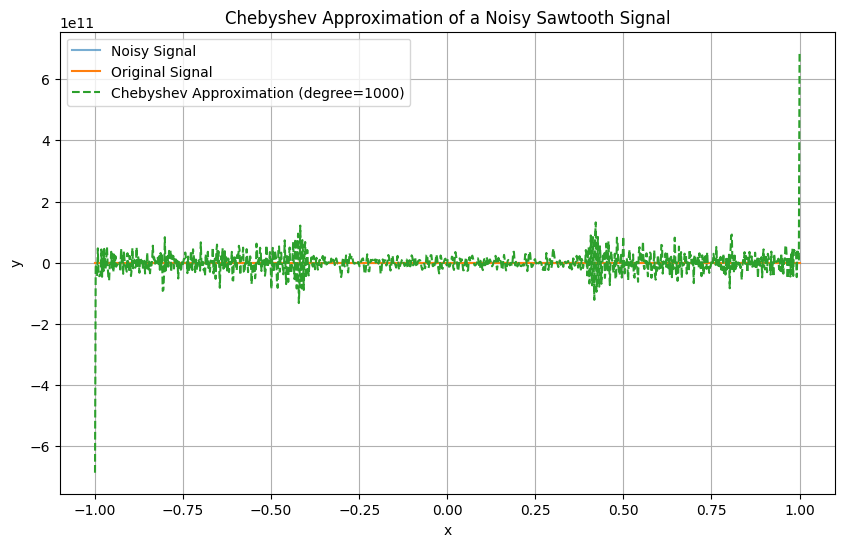

In [ ]:


def chebyshev_approximation_with_noise(signal_type, degree, noise_level):
    # Step 1: Generate a sample signal
    x = np.linspace(-1, 1, 1000)
    
    # Generate the signal based on the specified type
    if signal_type == 'sine':
        signal = np.sin(5 * np.pi * x) 
    elif signal_type == 'square':
        signal = np.sign(np.sin(5 * np.pi * x))
    elif signal_type == 'sawtooth':
        signal = 2 * (x - np.floor(x + 0.5)) * 500
    else:
        raise ValueError("Unsupported signal type. Choose 'sine', 'square', or 'sawtooth'.")
    
    # Add noise to the signal
    noise = noise_level * np.random.normal(size=x.size)
    noisy_signal = signal + noise
    
    # Step 2: Perform Chebyshev approximation
    cheb_approx = cpt_compress_t(noisy_signal, 0.1, True)
    
    # Step 3: Visualize the results
    plt.figure(figsize=(10, 6))
    plt.plot(x, noisy_signal, label='Noisy Signal', alpha=0.6)
    plt.plot(x, signal, label='Original Signal')
    plt.plot(x, cheb_approx, label=f'Chebyshev Approximation (degree={degree})', linestyle='--')
    plt.legend()
    plt.title(f'Chebyshev Approximation of a Noisy {signal_type.capitalize()} Signal')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()

# Example usage
chebyshev_approximation_with_noise('sine', 1000, 0.1)
chebyshev_approximation_with_noise('square', 1000, 0.1)
chebyshev_approximation_with_noise('sawtooth', 1000, 0.1)